## Implement the Continuous Bag of Words (CBOW) Model. Stages can be:
a. Data preparation<br>
b. Generate training data<br>
c. Train model<br>
d. Output<br>

In [1]:
import numpy as np
import re

In [2]:
data = """Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning. Learning can be supervised, semi-supervised or unsupervised. Deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks, convolutional neural networks and Transformers have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance."""
data

'Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning. Learning can be supervised, semi-supervised or unsupervised. Deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks, convolutional neural networks and Transformers have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance.'

In [3]:
sentences = data.split('.')
sentences

['Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning',
 ' Learning can be supervised, semi-supervised or unsupervised',
 ' Deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks, convolutional neural networks and Transformers have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance',
 '']

In [4]:
clean_sent=[]
for sentence in sentences:
    if sentence=="":
        continue
    sentence = re.sub('[^A-Za-z0-9]+', ' ', (sentence))
    sentence = re.sub(r'(?:^| )\w (?:$| )', ' ', (sentence)).strip()
    sentence = sentence.lower()
    clean_sent.append(sentence)

clean_sent

['deep learning also known as deep structured learning is part of a broader family of machine learning methods based on artificial neural networks with representation learning',
 'learning can be supervised semi supervised or unsupervised',
 'deep learning architectures such as deep neural networks deep belief networks deep reinforcement learning recurrent neural networks convolutional neural networks and transformers have been applied to fields including computer vision speech recognition natural language processing machine translation bioinformatics drug design medical image analysis climate science material inspection and board game programs where they have produced results comparable to and in some cases surpassing human expert performance']

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_sent)
sequences = tokenizer.texts_to_sequences(clean_sent)
print(sequences)

[[2, 1, 12, 13, 6, 2, 14, 1, 15, 16, 7, 17, 18, 19, 7, 8, 1, 20, 21, 22, 23, 4, 3, 24, 25, 1], [1, 26, 27, 9, 28, 9, 29, 30], [2, 1, 31, 32, 6, 2, 4, 3, 2, 33, 3, 2, 34, 1, 35, 4, 3, 36, 4, 3, 5, 37, 10, 38, 39, 11, 40, 41, 42, 43, 44, 45, 46, 47, 48, 8, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 5, 60, 61, 62, 63, 64, 10, 65, 66, 67, 11, 5, 68, 69, 70, 71, 72, 73, 74]]


In [7]:
index_to_word = {}
word_to_index = {}

for i, sequence in enumerate(sequences):
#     print(sequence)
    word_in_sentence = clean_sent[i].split()
#     print(word_in_sentence)
    
    for j, value in enumerate(sequence):
        index_to_word[value] = word_in_sentence[j]
        word_to_index[word_in_sentence[j]] = value

print(index_to_word, "\n")
print(word_to_index)

{2: 'deep', 1: 'learning', 12: 'also', 13: 'known', 6: 'as', 14: 'structured', 15: 'is', 16: 'part', 7: 'of', 17: 'a', 18: 'broader', 19: 'family', 8: 'machine', 20: 'methods', 21: 'based', 22: 'on', 23: 'artificial', 4: 'neural', 3: 'networks', 24: 'with', 25: 'representation', 26: 'can', 27: 'be', 9: 'supervised', 28: 'semi', 29: 'or', 30: 'unsupervised', 31: 'architectures', 32: 'such', 33: 'belief', 34: 'reinforcement', 35: 'recurrent', 36: 'convolutional', 5: 'and', 37: 'transformers', 10: 'have', 38: 'been', 39: 'applied', 11: 'to', 40: 'fields', 41: 'including', 42: 'computer', 43: 'vision', 44: 'speech', 45: 'recognition', 46: 'natural', 47: 'language', 48: 'processing', 49: 'translation', 50: 'bioinformatics', 51: 'drug', 52: 'design', 53: 'medical', 54: 'image', 55: 'analysis', 56: 'climate', 57: 'science', 58: 'material', 59: 'inspection', 60: 'board', 61: 'game', 62: 'programs', 63: 'where', 64: 'they', 65: 'produced', 66: 'results', 67: 'comparable', 68: 'in', 69: 'some', 

In [21]:
vocab_size = len(tokenizer.word_index) + 1
# emb_size = 10
context_size = 2

contexts = []
targets = []

for sequence in sequences:
    for i in range(context_size, len(sequence) - context_size):
        target = sequence[i]
        context = [sequence[i - 2], sequence[i - 1], sequence[i + 1], sequence[i + 2]]
#         print(context)
        contexts.append(context)
        targets.append(target)
print(contexts, "\n")
print(targets)

[[2, 1, 13, 6], [1, 12, 6, 2], [12, 13, 2, 14], [13, 6, 14, 1], [6, 2, 1, 15], [2, 14, 15, 16], [14, 1, 16, 7], [1, 15, 7, 17], [15, 16, 17, 18], [16, 7, 18, 19], [7, 17, 19, 7], [17, 18, 7, 8], [18, 19, 8, 1], [19, 7, 1, 20], [7, 8, 20, 21], [8, 1, 21, 22], [1, 20, 22, 23], [20, 21, 23, 4], [21, 22, 4, 3], [22, 23, 3, 24], [23, 4, 24, 25], [4, 3, 25, 1], [1, 26, 9, 28], [26, 27, 28, 9], [27, 9, 9, 29], [9, 28, 29, 30], [2, 1, 32, 6], [1, 31, 6, 2], [31, 32, 2, 4], [32, 6, 4, 3], [6, 2, 3, 2], [2, 4, 2, 33], [4, 3, 33, 3], [3, 2, 3, 2], [2, 33, 2, 34], [33, 3, 34, 1], [3, 2, 1, 35], [2, 34, 35, 4], [34, 1, 4, 3], [1, 35, 3, 36], [35, 4, 36, 4], [4, 3, 4, 3], [3, 36, 3, 5], [36, 4, 5, 37], [4, 3, 37, 10], [3, 5, 10, 38], [5, 37, 38, 39], [37, 10, 39, 11], [10, 38, 11, 40], [38, 39, 40, 41], [39, 11, 41, 42], [11, 40, 42, 43], [40, 41, 43, 44], [41, 42, 44, 45], [42, 43, 45, 46], [43, 44, 46, 47], [44, 45, 47, 48], [45, 46, 48, 8], [46, 47, 8, 49], [47, 48, 49, 50], [48, 8, 50, 51], [8, 

In [22]:
#printing features with target
for i in range(5):
    words = []
    target = index_to_word.get(targets[i])
    for j in contexts[i]:
        words.append(index_to_word.get(j))
    print(words," -> ", target)

['deep', 'learning', 'known', 'as']  ->  also
['learning', 'also', 'as', 'deep']  ->  known
['also', 'known', 'deep', 'structured']  ->  as
['known', 'as', 'structured', 'learning']  ->  deep
['as', 'deep', 'learning', 'is']  ->  structured


In [23]:
# Convert the contexts and targets to numpy arrays
X = np.array(contexts)
Y = np.array(targets)

In [24]:
# print(X)

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda 

In [26]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=emb_size, input_length=2*context_size),
    Lambda(lambda x: tf.reduce_mean(x, axis=1)),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dense(vocab_size, activation='softmax')
])


C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [27]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
history = model.fit(X, Y, epochs=80)

Epoch 1/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.0153 - loss: 4.3180 
Epoch 2/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1058 - loss: 4.3105
Epoch 3/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1428 - loss: 4.3024
Epoch 4/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1214 - loss: 4.2909
Epoch 5/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0845 - loss: 4.2765 
Epoch 6/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1001 - loss: 4.2567
Epoch 7/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1001 - loss: 4.2287 
Epoch 8/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0984 - loss: 4.1827
Epoch 9/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0849 - loss: 4.1272
Epoch 10/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0575 - loss: 4.0890
Epoch 11/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0614 - loss: 4.0095
Epoch 12/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0849 - loss: 3.8903
Epoch 13

<Axes: >

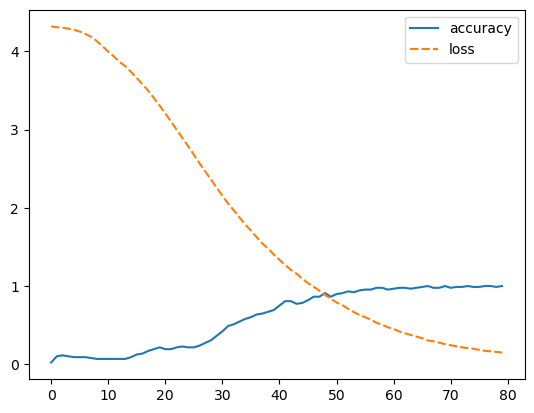

In [29]:
import seaborn as sns
sns.lineplot(model.history.history)

In [30]:
# from sklearn.decomposition import PCA

# embeddings = model.get_weights()[0]

# pca = PCA(n_components=2)
# reduced_embeddings = pca.fit_transform(embeddings)

In [31]:
print("'Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning. Learning can be supervised, semi-supervised or unsupervised. Deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks, convolutional neural networks and Transformers have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance.")

'Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning. Learning can be supervised, semi-supervised or unsupervised. Deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks, convolutional neural networks and Transformers have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance.


In [32]:
# test model: select some sentences from above paragraph
test_sentenses = [
    "known as structured learning",
    "transformers have applied to",
    "where they produced results",
    "cases surpassing expert performance",
    "comparable to in some",
    "some cases surpassing human"
]

In [33]:
for sent in test_sentenses:
    test_words = sent.split(" ")
#     print(test_words)
    x_test =[]
    for i in test_words:
        x_test.append(word_to_index.get(i))
    x_test = np.array([x_test])
#     print(x_test)
    
    pred = model.predict(x_test)
    pred = np.argmax(pred[0])
    print("pred ", test_words, "\n=", index_to_word.get(pred),"\n\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
pred  ['known', 'as', 'structured', 'learning'] 
= deep 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
pred  ['transformers', 'have', 'applied', 'to'] 
= been 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
pred  ['where', 'they', 'produced', 'results'] 
= have 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
pred  ['cases', 'surpassing', 'expert', 'performance'] 
= human 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
pred  ['comparable', 'to', 'in', 'some'] 
= and 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
pred  ['some', 'cases', 'surpassing', 'human'] 
= surpassing 


